# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [4]:
heroes_df = pd.read_csv("heroes_information.csv")
powers_df = pd.read_csv("super_hero_powers.csv")

In [5]:
powers_df

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Abraxas,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
6,Absorbing Man,False,False,False,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7,Adam Monroe,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,Adam Strange,False,False,False,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
9,Agent Bob,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [6]:
heroes_df.drop("Unnamed: 0", axis=1, inplace=True)
heroes_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0
8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [7]:
# heroes_df.describe()
# powers_df.describe()
# heroes_df.info()
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [8]:
# Publisher has just 15 null vals. Since it's a categorical value, add an "unknown" category.
heroes_df.loc[heroes_df["Publisher"].isnull()] = "unknown"

In [9]:
# drop skin color colum because it's mostly empty
heroes_df.drop("Skin color", axis=1, inplace=True)

In [10]:
# for Eye color, Race, Hair color, and Gender add "unknown" categories in place of dashes
heroes_df.loc[heroes_df["Eye color"] == '-'] = "unknown"
heroes_df.loc[heroes_df["Race"] == '-'] = "unknown"
heroes_df.loc[heroes_df["Hair color"] == '-'] = "unknown"
heroes_df.loc[heroes_df["Gender"] == '-'] = "unknown"
heroes_df.loc[heroes_df["Alignment"] == '-'] = "unknown"

In [11]:
heroes_df.isnull().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Alignment     0
Weight        0
dtype: int64

In [12]:
heroes_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203,Marvel Comics,good,441
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191,Dark Horse Comics,good,65
2,Abin Sur,Male,blue,Ungaran,No Hair,185,DC Comics,good,90
3,Abomination,Male,green,Human / Radiation,No Hair,203,Marvel Comics,bad,441
4,Abraxas,Male,blue,Cosmic Entity,Black,-99,Marvel Comics,bad,-99
5,Absorbing Man,Male,blue,Human,No Hair,193,Marvel Comics,bad,122
6,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
7,Adam Strange,Male,blue,Human,Blond,185,DC Comics,good,88
8,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
9,Agent Bob,Male,brown,Human,Brown,178,Marvel Comics,good,81


## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [13]:
powers_df.rename(columns = {'hero_names':'name'}, inplace=True)
powers_df.set_index('name', inplace=True)
heroes_df.set_index('name', inplace=True)
hero_powers_df = heroes_df.join(powers_df, how="left")

In [14]:
hero_powers_df.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,Agility,Accelerated Healing,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203,Marvel Comics,good,441,False,True,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191,Dark Horse Comics,good,65,True,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185,DC Comics,good,90,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203,Marvel Comics,bad,441,False,True,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,-99,Marvel Comics,bad,-99,False,False,...,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [15]:
maledf = hero_powers_df[hero_powers_df.Gender == "Male"]
femaledf = hero_powers_df[hero_powers_df.Gender == "Female"]

In [16]:
maledf.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,Agility,Accelerated Healing,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203,Marvel Comics,good,441,False,True,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191,Dark Horse Comics,good,65,True,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185,DC Comics,good,90,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203,Marvel Comics,bad,441,False,True,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,-99,Marvel Comics,bad,-99,False,False,...,False,False,False,False,False,False,False,False,False,False


## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [17]:
def show_distplot(dataframe, gender, column_name):
    if gender == 'Male':
        df_gen = dataframe[dataframe.Gender == "Male"]
    if gender == 'Female':
        df_gen = dataframe[dataframe.Gender == "Female"]
    return df_gen[column_name].plot(kind="hist")

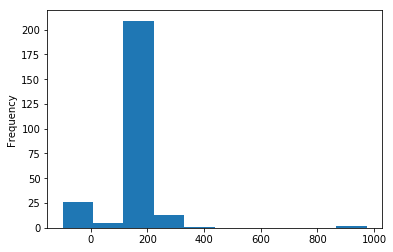

In [18]:
# Male Height
show_distplot(hero_powers_df, 'Male', 'Height')

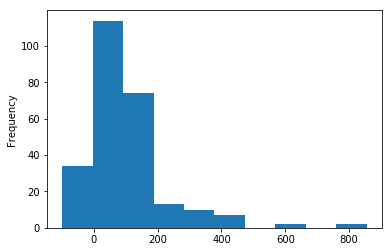

In [19]:
# Male Weight
show_distplot(hero_powers_df, 'Male', 'Weight')

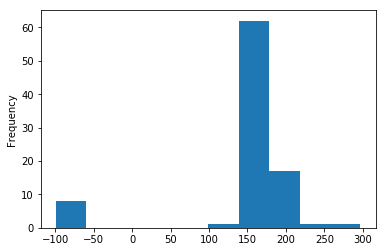

In [20]:
# Female Height
show_distplot(hero_powers_df, 'Female', 'Height')

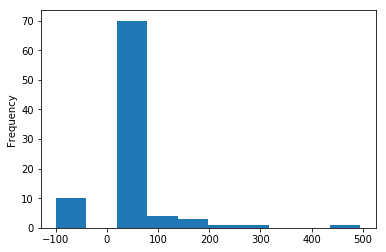

In [21]:
# Female Weight
show_distplot(hero_powers_df, 'Female', 'Weight')

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

Super Strength    360
Stamina           289
Durability        257
Super Speed       249
Agility           242
dtype: int64

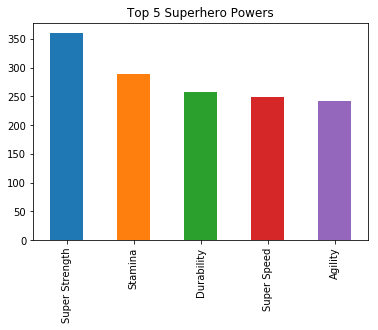

In [79]:
powers_df.sum().sort_values(ascending=False)[:5].plot(kind='bar', title="Top 5 Superhero Powers")
powers_df.sum().sort_values(ascending=False)[:5]
# Most common:
#     Super Strength 360
#     Stamina: 289 
#     Durability: 257
#     Agility: 242
#     Flight: 212



Super Strength    120.0
Stamina           109.0
Durability         98.0
Agility            94.0
Super Speed        89.0
dtype: float64

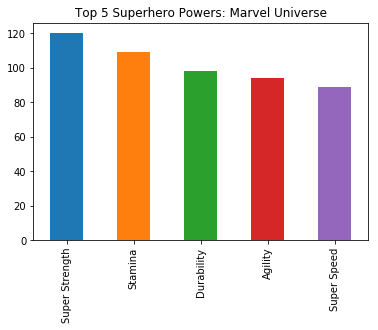

In [77]:
# Counts of powers in Marvel Universe
MC_powers = hero_powers_df[hero_powers_df['Publisher']=="Marvel Comics"].iloc[:,8:]

MC_powers.sum().sort_values(ascending=False)[:5].plot(kind='bar', title="Top 5 Superhero Powers: Marvel Universe")

MC_powers.sum().sort_values(ascending=False)[:5]

Super Strength    73.0
Stamina           70.0
Agility           62.0
Super Speed       60.0
Durability        54.0
dtype: float64

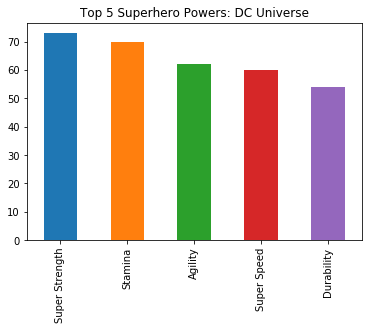

In [78]:
DC_powers = hero_powers_df[hero_powers_df['Publisher']=="DC Comics"].iloc[:,8:]
DC_powers.sum().sort_values(ascending=False)[:5].plot(kind='bar', title="Top 5 Superhero Powers: DC Universe")
DC_powers.sum().sort_values(ascending=False)[:5]

In [ ]:
#They have the same top 5, though the percentages and order are different

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data